In [8]:
library(arules)
library(arulesViz)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: grid


In [4]:
faceplate1<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\Data mining\\final\\faceplate.csv')

head(faceplate1)

Transaction,Red,White,Blue,Orange,Green,Yellow
1,1,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,1,0,0,0
4,1,1,0,1,0,0
5,1,0,1,0,0,0
6,0,1,1,0,0,0


In [9]:
# Transforming data frame object into matrix object

faceplate<-as.matrix(faceplate1[,-1])

In [10]:
# Transforming matrix object into transaction object

txn<-as(faceplate,'transactions')

inspect(txn)

     items                 
[1]  {Red,White,Green}     
[2]  {White,Orange}        
[3]  {White,Blue}          
[4]  {Red,White,Orange}    
[5]  {Red,Blue}            
[6]  {White,Blue}          
[7]  {Red,Blue}            
[8]  {Red,White,Blue,Green}
[9]  {Red,White,Blue}      
[10] {Yellow}              


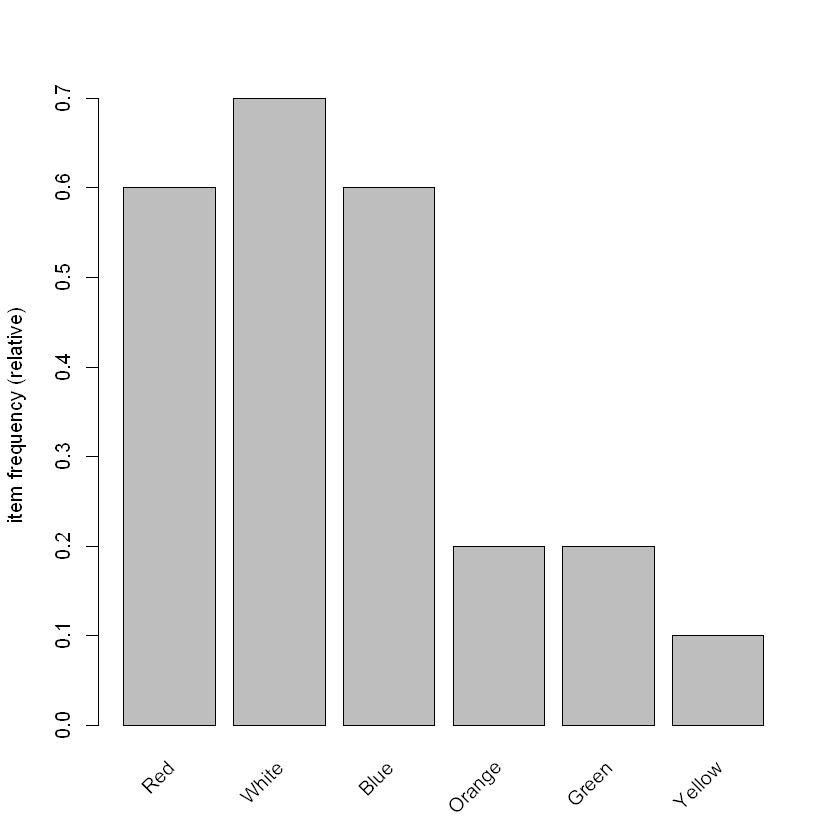

In [11]:
itemFrequencyPlot(txn)

In [12]:
rules<-apriori(txn,parameter = list(minlen=2,maxlen=2,
                                    supp=0.001,conf=0.001))
inspect(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.001    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target   ext
      2  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2

Warning message in apriori(txn, parameter = list(minlen = 2, maxlen = 2, supp = 0.001, :
"Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!"

 done [0.01s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs         rhs      support confidence lift     
[1]  {Orange} => {Red}    0.1     0.5000000  0.8333333
[2]  {Red}    => {Orange} 0.1     0.1666667  0.8333333
[3]  {Orange} => {White}  0.2     1.0000000  1.4285714
[4]  {White}  => {Orange} 0.2     0.2857143  1.4285714
[5]  {Green}  => {Blue}   0.1     0.5000000  0.8333333
[6]  {Blue}   => {Green}  0.1     0.1666667  0.8333333
[7]  {Green}  => {Red}    0.2     1.0000000  1.6666667
[8]  {Red}    => {Green}  0.2     0.3333333  1.6666667
[9]  {Green}  => {White}  0.2     1.0000000  1.4285714
[10] {White}  => {Green}  0.2     0.2857143  1.4285714
[11] {Blue}   => {Red}    0.4     0.6666667  1.1111111
[12] {Red}    => {Blue}   0.4     0.6666667  1.1111111
[13] {Blue}   => {White}  0.4     0.6666667  0.9523810
[14] {White}  => {Blue}   0.4     0.5714286  0.9523810
[15] {Red}    => {White}  0.4     0.6666667  0.9523810
[16] {White}  => {Red}    0.

In [13]:
rules_s<-sort(rules,by='support')
inspect(rules_s)

     lhs         rhs      support confidence lift     
[1]  {Blue}   => {Red}    0.4     0.6666667  1.1111111
[2]  {Red}    => {Blue}   0.4     0.6666667  1.1111111
[3]  {Blue}   => {White}  0.4     0.6666667  0.9523810
[4]  {White}  => {Blue}   0.4     0.5714286  0.9523810
[5]  {Red}    => {White}  0.4     0.6666667  0.9523810
[6]  {White}  => {Red}    0.4     0.5714286  0.9523810
[7]  {Orange} => {White}  0.2     1.0000000  1.4285714
[8]  {White}  => {Orange} 0.2     0.2857143  1.4285714
[9]  {Green}  => {Red}    0.2     1.0000000  1.6666667
[10] {Red}    => {Green}  0.2     0.3333333  1.6666667
[11] {Green}  => {White}  0.2     1.0000000  1.4285714
[12] {White}  => {Green}  0.2     0.2857143  1.4285714
[13] {Orange} => {Red}    0.1     0.5000000  0.8333333
[14] {Red}    => {Orange} 0.1     0.1666667  0.8333333
[15] {Green}  => {Blue}   0.1     0.5000000  0.8333333
[16] {Blue}   => {Green}  0.1     0.1666667  0.8333333


In [14]:
rules_df<-as(rules,'data.frame')
rules_df[1,]

rules,support,confidence,lift
{Orange} => {Red},0.1,0.5,0.8333333


In [15]:
# Calcualting support by hand

table(faceplate1$Orange,faceplate1$Red)

1/(3+5+1)

   
    0 1
  0 3 5
  1 1 1

[1] 0.1111111

In [16]:
# Calculating confidence by hand
rules_df[1,]

# confidence= P(Red|Orange)=(P(Red)*P(Orange|Red))/P(Orange)=P(Red and Orange)/P(Orange)

prop.table(table(faceplate1$Orange,faceplate1$Red),1) #0.5

rules,support,confidence,lift
{Orange} => {Red},0.1,0.5,0.8333333


   
        0     1
  0 0.375 0.625
  1 0.500 0.500

In [17]:
# Calcualting lift by hand
# Lift=P(Red|Orange)/P(Red)=1/2 / 6/10=0.5/0.6

table(faceplate1$Red)

prop.table(table(faceplate1$Orange,faceplate1$Red),1)

0.5/0.6


0 1 
4 6 

   
        0     1
  0 0.375 0.625
  1 0.500 0.500

[1] 0.8333333

In [18]:
## Let's ease the rules by taking out minlen and maxlen

rules1<-apriori(txn,parameter = list(supp=0.001,conf=0.001))

inspect(rules1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.001    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [41 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                   rhs      support confidence lift     
[1]  {}                 => {Yellow} 0.1     0.1000000  1.0000000
[2]  {}                 => {Orange} 0.2     0.2000000  1.0000000
[3]  {}                 => {Green}  0.2     0.2000000  1.0000000
[4]  {}                 => {Blu

In [19]:
rules1<-apriori(txn,parameter = list(minlen=2,supp=0.001,conf=0.001))

inspect(rules1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.001    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [35 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                   rhs      support confidence lift     
[1]  {Orange}           => {Red}    0.1     0.5000000  0.8333333
[2]  {Red}              => {Orange} 0.1     0.1666667  0.8333333
[3]  {Orange}           => {White}  0.2     1.0000000  1.4285714
[4]  {White}            => {Ora

In [20]:
rules1_s<-sort(rules1,by='support')
inspect(rules1_s)

     lhs                   rhs      support confidence lift     
[1]  {Blue}             => {Red}    0.4     0.6666667  1.1111111
[2]  {Red}              => {Blue}   0.4     0.6666667  1.1111111
[3]  {Blue}             => {White}  0.4     0.6666667  0.9523810
[4]  {White}            => {Blue}   0.4     0.5714286  0.9523810
[5]  {Red}              => {White}  0.4     0.6666667  0.9523810
[6]  {White}            => {Red}    0.4     0.5714286  0.9523810
[7]  {Orange}           => {White}  0.2     1.0000000  1.4285714
[8]  {White}            => {Orange} 0.2     0.2857143  1.4285714
[9]  {Green}            => {Red}    0.2     1.0000000  1.6666667
[10] {Red}              => {Green}  0.2     0.3333333  1.6666667
[11] {Green}            => {White}  0.2     1.0000000  1.4285714
[12] {White}            => {Green}  0.2     0.2857143  1.4285714
[13] {Red,Green}        => {White}  0.2     1.0000000  1.4285714
[14] {White,Green}      => {Red}    0.2     1.0000000  1.6666667
[15] {Red,White}        =

In [21]:
rules1_l<-sort(rules1,by='lift')
inspect(rules1_l)

     lhs                   rhs      support confidence lift     
[1]  {Red,White}        => {Green}  0.2     0.5000000  2.5000000
[2]  {Red,White,Blue}   => {Green}  0.1     0.5000000  2.5000000
[3]  {Green}            => {Red}    0.2     1.0000000  1.6666667
[4]  {Blue,Green}       => {Red}    0.1     1.0000000  1.6666667
[5]  {White,Green}      => {Red}    0.2     1.0000000  1.6666667
[6]  {White,Blue,Green} => {Red}    0.1     1.0000000  1.6666667
[7]  {Red}              => {Green}  0.2     0.3333333  1.6666667
[8]  {Orange}           => {White}  0.2     1.0000000  1.4285714
[9]  {Green}            => {White}  0.2     1.0000000  1.4285714
[10] {Red,Orange}       => {White}  0.1     1.0000000  1.4285714
[11] {Blue,Green}       => {White}  0.1     1.0000000  1.4285714
[12] {Red,Green}        => {White}  0.2     1.0000000  1.4285714
[13] {Red,Blue,Green}   => {White}  0.1     1.0000000  1.4285714
[14] {White}            => {Orange} 0.2     0.2857143  1.4285714
[15] {White}            =

In [22]:
rules1_r<-subset(rules1, rhs %in% 'Red')
inspect(rules1_r)

    lhs                   rhs   support confidence lift     
[1] {Orange}           => {Red} 0.1     0.5000000  0.8333333
[2] {Green}            => {Red} 0.2     1.0000000  1.6666667
[3] {Blue}             => {Red} 0.4     0.6666667  1.1111111
[4] {White}            => {Red} 0.4     0.5714286  0.9523810
[5] {White,Orange}     => {Red} 0.1     0.5000000  0.8333333
[6] {Blue,Green}       => {Red} 0.1     1.0000000  1.6666667
[7] {White,Green}      => {Red} 0.2     1.0000000  1.6666667
[8] {White,Blue}       => {Red} 0.2     0.5000000  0.8333333
[9] {White,Blue,Green} => {Red} 0.1     1.0000000  1.6666667


In [23]:
# lhs with Orange or White
rules_3<-subset(rules1, lhs %in% c('Orange','White'))
inspect(rules_3)

     lhs                   rhs      support confidence lift     
[1]  {Orange}           => {Red}    0.1     0.5000000  0.8333333
[2]  {Orange}           => {White}  0.2     1.0000000  1.4285714
[3]  {White}            => {Orange} 0.2     0.2857143  1.4285714
[4]  {White}            => {Green}  0.2     0.2857143  1.4285714
[5]  {White}            => {Blue}   0.4     0.5714286  0.9523810
[6]  {White}            => {Red}    0.4     0.5714286  0.9523810
[7]  {Red,Orange}       => {White}  0.1     1.0000000  1.4285714
[8]  {White,Orange}     => {Red}    0.1     0.5000000  0.8333333
[9]  {Red,White}        => {Orange} 0.1     0.2500000  1.2500000
[10] {White,Green}      => {Blue}   0.1     0.5000000  0.8333333
[11] {White,Blue}       => {Green}  0.1     0.2500000  1.2500000
[12] {White,Green}      => {Red}    0.2     1.0000000  1.6666667
[13] {Red,White}        => {Green}  0.2     0.5000000  2.5000000
[14] {White,Blue}       => {Red}    0.2     0.5000000  0.8333333
[15] {Red,White}        =

In [24]:
# lhs with Orange and White
rules_4<-subset(rules1, lhs %ain% c('Red','White'))
inspect(rules_4)

    lhs                  rhs      support confidence lift     
[1] {Red,White}       => {Orange} 0.1     0.25       1.2500000
[2] {Red,White}       => {Green}  0.2     0.50       2.5000000
[3] {Red,White}       => {Blue}   0.2     0.50       0.8333333
[4] {Red,White,Green} => {Blue}   0.1     0.50       0.8333333
[5] {Red,White,Blue}  => {Green}  0.1     0.50       2.5000000


Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Scatter plot for 16 rules
interactive	 =  FALSE
pch	 =  19
cex	 =  0.5
xlim	 =  NULL
ylim	 =  NULL
zlim	 =  NULL
alpha	 =  NULL
col	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACA

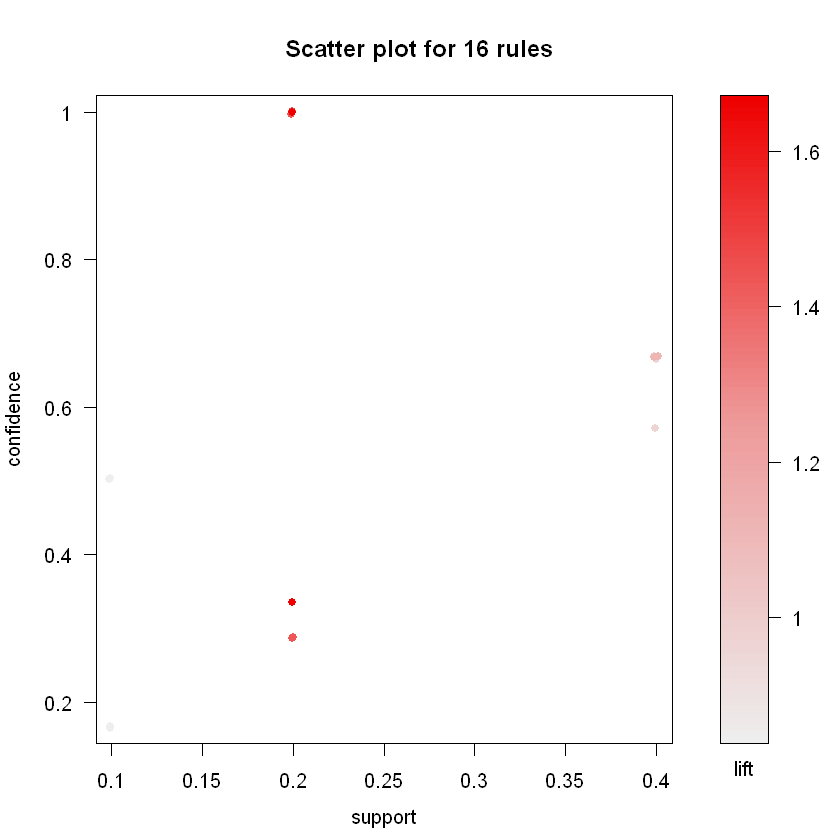

In [30]:
plot(rules,type='scatterplot')

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Scatter plot for 35 rules
interactive	 =  FALSE
pch	 =  19
cex	 =  0.5
xlim	 =  NULL
ylim	 =  NULL
zlim	 =  NULL
alpha	 =  NULL
col	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACA

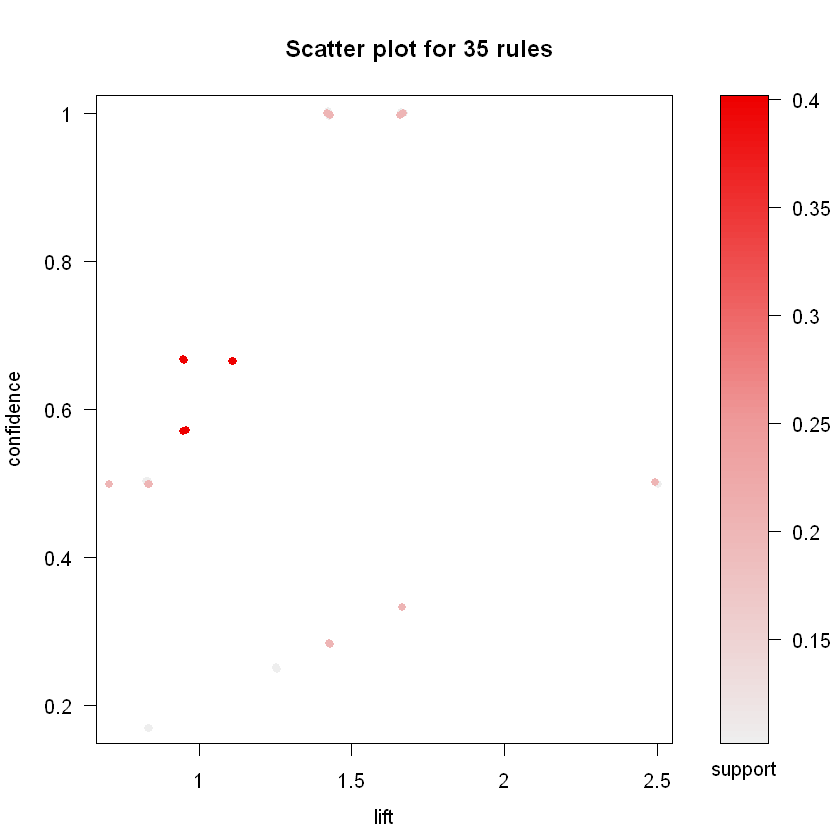

In [31]:
plot(rules1,type='scatterplot',
     measure=c('lift','confidence'),shading='support')

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Scatter plot for 35 rules
interactive	 =  FALSE
pch	 =  19
cex	 =  0.5
xlim	 =  NULL
ylim	 =  NULL
zlim	 =  NULL
alpha	 =  NULL
col	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACA

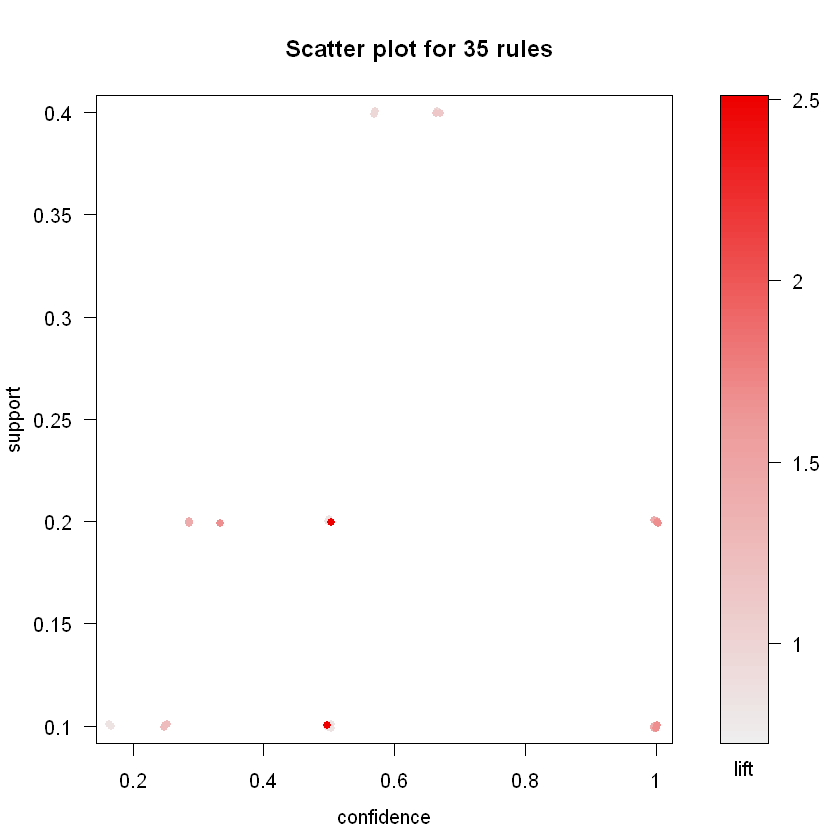

In [32]:
plot(rules1,type='scatterplot',
     measure=c('confidence','support'),shading='lift')

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Scatter plot for 35 rules
interactive	 =  FALSE
pch	 =  19
cex	 =  0.5
xlim	 =  NULL
ylim	 =  NULL
zlim	 =  NULL
alpha	 =  NULL
col	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACA

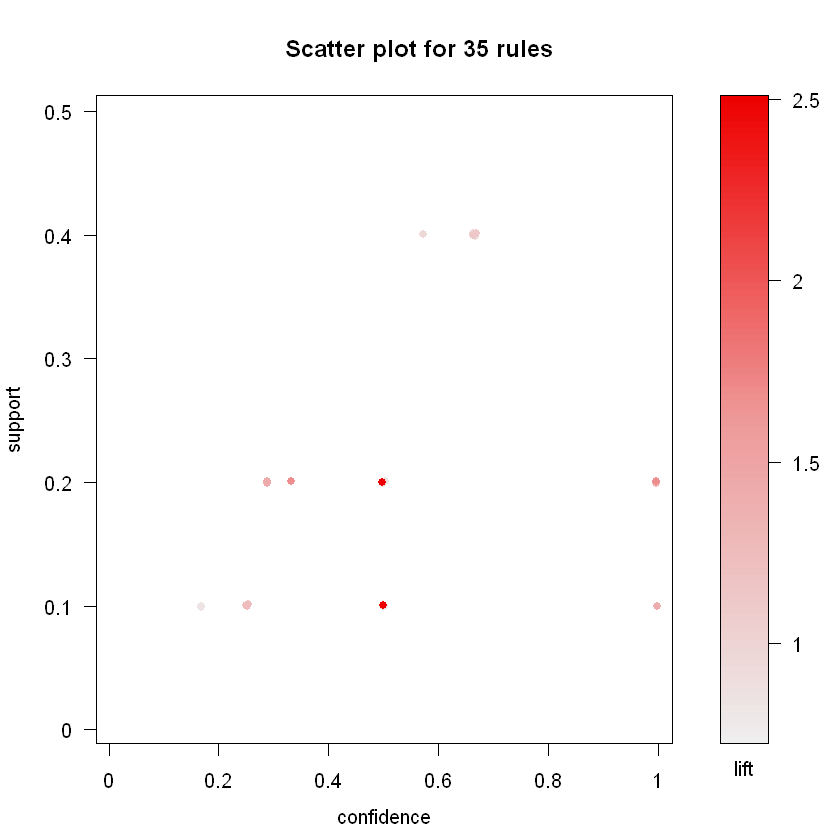

In [33]:
plot(rules1,type='scatterplot',
     measure=c('confidence','support'),shading='lift',
     xlim=c(0.001,1),ylim=c(0.001,0.5))

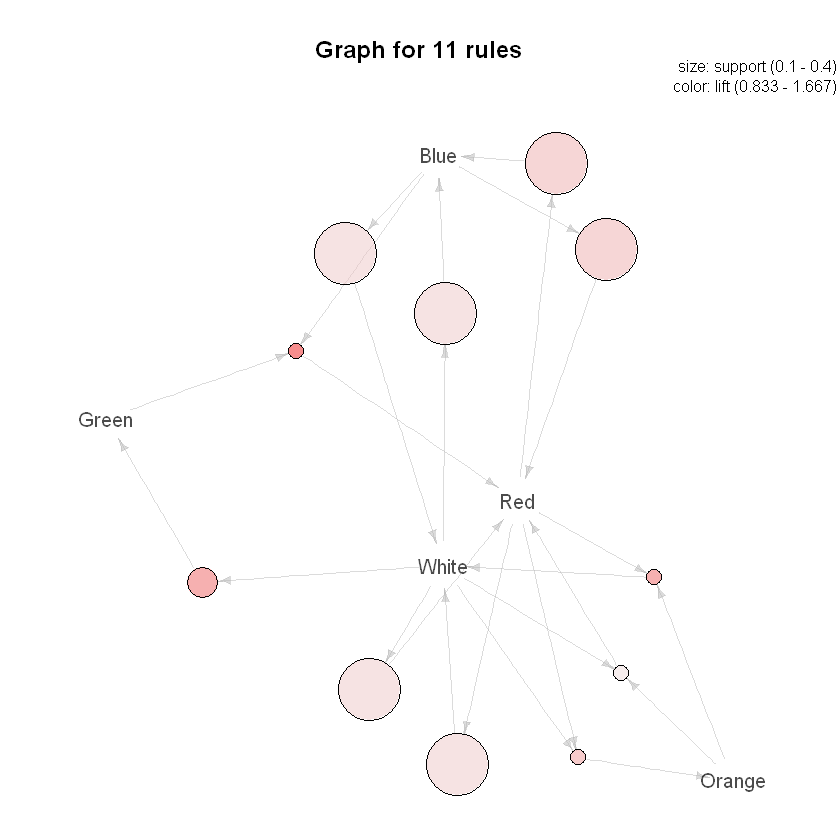

In [34]:
plot(rules1[10:20],method='graph')

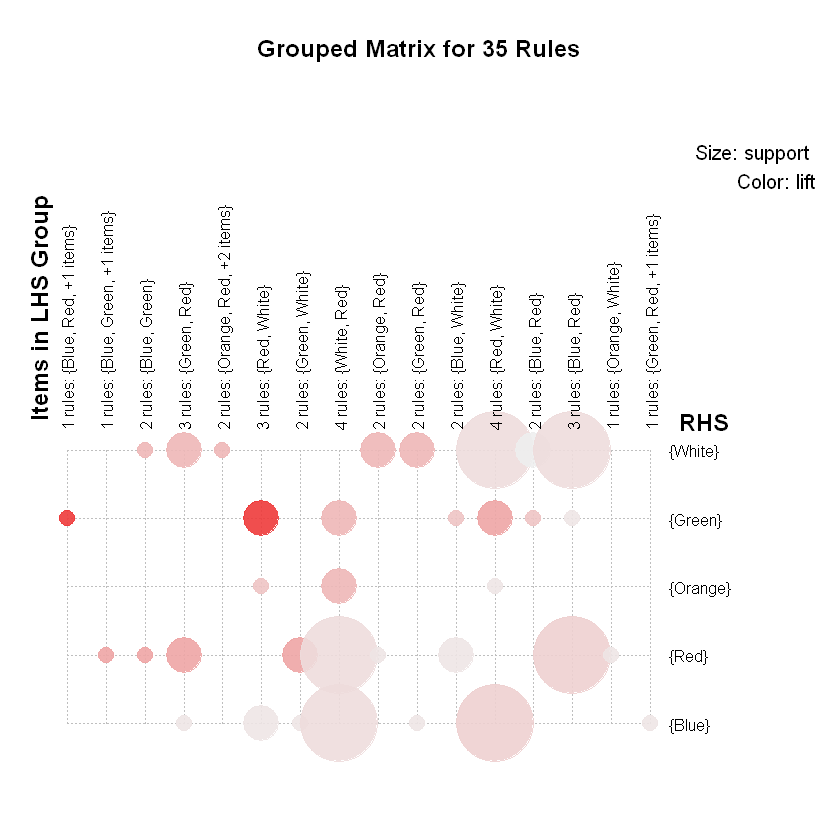

In [35]:
plot(rules1,method='grouped')